In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
FILE_X = 'data/linearX.csv'
FILE_Y = 'data/linearY.csv'

In [15]:
lrate = 0.0001
numitr = 10
losslim = 0.00012

In [3]:
datax = np.genfromtxt(FILE_X, delimiter=',')
datay = np.genfromtxt(FILE_Y, delimiter=',')

In [16]:
# batch wise learning
p = np.zeros(2).astype(float)
loss = 100
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
while loss > losslim:
    loss = 0
    jvals = []
    dp = np.zeros_like(p).astype(float)
    for i in range(0,len(datax)):
        hx = np.matmul(p,[1,datax[i]])
        error = hx - datay[i]
        jvals.append((error**2)/2)
        loss += (error**2)/2
        delta = error*np.asarray([1,datax[i]])
        dp += lrate*delta
#     ax = plt.figure().add_subplot(111, projection='3d')
#     ax.scatter(datax, datay, np.asarray(jvals))
#     plt.show()
#     time.sleep(0.1)
    print(loss)
    dp = dp
    p -= dp
    

49.66279047145004
6.676692800334354
2.523273821972569
2.1204990785645985
2.079980598239529
2.074451925006095
2.0723041233533968
2.070484252351599
2.068697443402213
2.0669152155119783
2.065134816657102
2.063355979839762
2.0615786780786576
2.059802907575456
2.0580286667719614
2.056255954327373
2.0544847689229098
2.052715109242941
2.0509469739731636
2.049180361800429
2.0474152714127185
2.0456517014991453
2.043889650749951
2.042129117856502
2.040370101511302
2.038612600407971
2.036856613241255
2.0351021387070345
2.0333491755023014
2.0315977223251767
2.0298477778749
2.0280993408518313
2.026352409957453
2.0246069838943628
2.022863061366279
2.0211206410780354
2.0193797217355796
2.0176403020459768
2.0159023807174026
2.0141659564591494
2.0124310279816178
2.010697593996322
2.0089656532158826
2.007235204354037
2.0055062461256186
2.0037787772465774
2.0020527964339667
2.000328302405949
1.998605293881777
1.9968837695818231
1.9951637282275558
1.993445168541541
1.9917280892474516
1.990012489070051
1.9

1.2187465763702183
1.2176968335373726
1.216647994968034
1.2156000598832606
1.2145530275047751
1.213506897054974
1.2124616677569247
1.2114173388343596
1.2103739095116832
1.209331379013969
1.2082897465669535
1.2072490113970455
1.2062091727313171
1.2051702297975053
1.2041321818240138
1.2030950280399122
1.2020587676749341
1.2010233999594717
1.1999889241245885
1.1989553394020036
1.1979226450240976
1.19689084022392
1.1958599242351704
1.1948298962922188
1.1938007556300867
1.1927725014844588
1.1917451330916755
1.19071864968874
1.1896930505133068
1.188668334803689
1.18764450179886
1.1866215507384414
1.1855994808627153
1.1845782914126166
1.183557981629734
1.1825385507563106
1.1815199980352387
1.1805023227100666
1.1794855240249946
1.1784696012248708
1.1774545535551948
1.176440380262117
1.1754270805924365
1.1744146537936038
1.1734030991137137
1.1723924158015098
1.1713826031063843
1.170373660278376
1.169365586568168
1.1683583812270892
1.1673520435071159
1.1663465726608655
1.1653419679415997
1.16433

0.7112558440586528
0.7106432610100599
0.7100312056492777
0.7094196775217481
0.708808676173304
0.7081982011501716
0.7075882519989669
0.7069788282666959
0.7063699295007543
0.7057615552489294
0.7051537050593972
0.7045463784807234
0.7039395750618612
0.7033332943521534
0.7027275359013309
0.7021222992595133
0.7015175839772056
0.7009133896053023
0.7003097156950834
0.699706561798214
0.6991039274667505
0.6985018122531292
0.6979002157101757
0.6972991373910997
0.6966985768494949
0.6960985336393414
0.6954990073150009
0.6948999974312223
0.6943015035431357
0.693703525206255
0.6931060619764767
0.6925091134100806
0.6919126790637276
0.6913167584944614
0.6907213512597087
0.6901264569172737
0.6895320750253443
0.6889382051424883
0.688344846827654
0.6877519996401695
0.6871596631397414
0.686567836886458
0.6859765204407838
0.6853857133635632
0.6847954152160206
0.6842056255597554
0.6836163439567456
0.6830275699693477
0.6824393031602942
0.6818515430926935
0.6812642893300321
0.6806775414361717
0.680091298975349

0.4801693486164371
0.47975582678425516
0.4793426611657015
0.4789298514539281
0.4785173973423527
0.47810529852465505
0.47769355469478003
0.47728216554693714
0.4768711307755969
0.4764604500754949
0.47605012314162937
0.47564014966926027
0.4752305293539115
0.4748212618913683
0.47441234697767826
0.47400378430915047
0.4735955735823559
0.47318771449412744
0.47278020674155846
0.4723730500220026
0.4719662440330758
0.47155978847265384
0.47115368303887156
0.47074792743012606
0.47034252134507243
0.46993746448262563
0.46953275654196097
0.4691283972225119
0.4687243862239714
0.46832072324629054
0.4679174079896789
0.46751444015460547
0.46711181944179514
0.46670954555223326
0.46630761818715977
0.46590603704807493
0.46550480183673365
0.4651039122551491
0.46470336800559175
0.4643031687905864
0.46390331431291576
0.46350380427561844
0.4631046383819883
0.4627058163355747
0.4623073378401841
0.46190920259987506
0.46151141031896364
0.46111396070201954
0.46071685345386715
0.46032008827958454
0.4599236648845053


0.3312327154994945
0.3309474898159033
0.3306625098298003
0.33037777532953866
0.33009328610365263
0.3298090419408596
0.3295250426300594
0.3292412879603323
0.328957777720941
0.32867451170133016
0.328391489691125
0.3281087114801321
0.32782617685833965
0.32754388561591646
0.3272618375432123
0.32698003243075696
0.32669847006926106
0.32641715024961515
0.32613607276289075
0.32585523740033845
0.32557464395338903
0.3252942922136531
0.3250141819729204
0.3247343130231603
0.3244546851565215
0.3241752981653314
0.3238961518420963
0.32361724597950137
0.32333858037041086
0.323060154807866
0.32278196908508855
0.3225040229954762
0.3222263163326054
0.3219488488902313
0.3216716204622853
0.3213946308428772
0.32111787982629364
0.3208413672069993
0.32056509277963474
0.3202890563390181
0.32001325768014477
0.3197376965981852
0.3194623728884882
0.31918728634657717
0.3189124367681529
0.3186378239490914
0.3183634476854447
0.3180893077734407
0.31781540400948266
0.31754173619014914
0.31726830411219475
0.31699510757

0.2290952524829755
0.22889800947266994
0.22870093637031783
0.22850403302955843
0.22830729930415664
0.22811073504800283
0.22791434011511447
0.22771811435963352
0.22752205763582817
0.22732616979809256
0.22713045070094584
0.22693490019903176
0.2267395181471204
0.22654430440010653
0.2263492588130101
0.22615438124097514
0.22595967153927168
0.22576512956329345
0.22557075516855943
0.22537654821071237
0.22518250854551994
0.22498863602887403
0.2247949305167901
0.2246013918654081
0.22440801993099196
0.22421481456992948
0.22402177563873182
0.22382890299403357
0.22363619649259375
0.22344365599129376
0.2232512813471389
0.22305907241725725
0.22286702905890027
0.22267515112944228
0.22248343848638086
0.22229189098733534
0.22210050849004861
0.22190929085238545
0.2217182379323339
0.22152734958800357
0.22133662567762666
0.2211460660595572
0.22095567059227164
0.22076543913436827
0.22057537154456686
0.22038546768170947
0.22019572740475843
0.2200061505727994
0.21981673704503832
0.21962748668080254
0.2194383

0.15860033046184852
0.15846381278688318
0.15832741271019818
0.1581911301304923
0.15805496494655227
0.15791891705725172
0.15778298636155105
0.1576471727584983
0.1575114761472283
0.1573758964269622
0.15724043349700897
0.15710508725676328
0.15696985760570714
0.15683474444340897
0.15669974766952366
0.15656486718379264
0.1564301028860436
0.1562954546761904
0.15616092245423355
0.15602650612025912
0.15589220557443978
0.15575802071703365
0.1556239514483854
0.15548999766892496
0.1553561592791684
0.15522243617971754
0.15508882827125944
0.1549553354545669
0.1548219576304984
0.15468869469999777
0.15455554656409354
0.1544225131239004
0.1542895942806179
0.1541567899355303
0.1540240999900073
0.1538915243455036
0.15375906290355867
0.1536267155657967
0.15349448223392675
0.1533623628097424
0.15323035719512218
0.15309846529202858
0.15296668700250912
0.1528350222286954
0.1527034708728034
0.15257203283713316
0.152440708024069
0.15230949633607963
0.152178397675717
0.1520474119456179
0.15191653904850258
0.15

0.11037736698185964
0.11028238925820529
0.11018749334972203
0.11009267918593335
0.10999794669642336
0.10990329581083629
0.10980872645887743
0.10971423857031275
0.10961983207496827
0.1095255069027308
0.10943126298354751
0.10933710024742596
0.10924301862443349
0.1091490180446984
0.10905509843840892
0.10896125973581317
0.10886750186721972
0.10877382476299698
0.1086802283535731
0.1085867125694367
0.10849327734113597
0.10839992259927884
0.10830664827453333
0.10821345429762688
0.10812034059934664
0.10802730711053951
0.10793435376211186
0.10784148048502974
0.10774868721031845
0.10765597386906291
0.10756334039240709
0.10747078671155474
0.10737831275776843
0.10728591846237016
0.10719360375674113
0.10710136857232151
0.10700921284061045
0.10691713649316643
0.10682513946160672
0.10673322167760745
0.10664138307290345
0.1065496235792889
0.10645794312861602
0.1063663416527963
0.10627481908379957
0.10618337535365453
0.10609201039444817
0.10600072413832587
0.10590951651749196
0.1058183874642088
0.10572

0.07630078135714194
0.07623515769233304
0.07616959055668872
0.076104079901514
0.07603862567815581
0.07597322783800288
0.07590788633248599
0.07584260111307775
0.07577737213129236
0.07571219933868592
0.07564708268685635
0.07558202212744317
0.07551701761212762
0.07545206909263237
0.075387176520722
0.07532233984820227
0.07525755902692079
0.07519283400876632
0.07512816474566951
0.07506355118960197
0.07499899329257696
0.07493449100664888
0.07487004428391358
0.07480565307650809
0.07474131733661085
0.07467703701644125
0.07461281206826005
0.07454864244436878
0.07448452809711055
0.07442046897886924
0.07435646504206961
0.07429251623917772
0.07422862252270043
0.07416478384518552
0.07410100015922158
0.07403727141743824
0.0739735975725056
0.0739099785771348
0.07384641438407767
0.07378290494612662
0.0737194502161151
0.07365605014691655
0.0735927046914456
0.07352941380265707
0.07346617743354646
0.07340299553714977
0.0733398680665435
0.07327679497484432
0.07321377621520964
0.07315081174083697
0.0730879

0.051501075306225615
0.051456814463349106
0.05141259174739656
0.051368407125524845
0.05132426056491913
0.05128015203279293
0.051236081496387954
0.05119204892297414
0.051148054279849586
0.051104097534340635
0.05106017865380175
0.051016297605615525
0.05097245435719258
0.05092864887597171
0.05088488112941959
0.05084115108503125
0.050797458710329285
0.05075380397286454
0.05071018684021586
0.05066660727998985
0.05062306525982113
0.050579560747372014
0.05053609371033294
0.05049266411642209
0.05044927193338536
0.05040591712899656
0.05036259967105701
0.05031931952739606
0.05027607666587063
0.05023287105436543
0.050189702660792646
0.05014657145309231
0.050103477399231905
0.05006042046720664
0.05001740062503925
0.049974417840779876
0.049931472082506416
0.049888563318324086
0.049845691516365774
0.04980285664479162
0.049760058671789155
0.04971729756557361
0.04967457329438732
0.04963188582649998
0.049589235130208825
0.0495466211738382
0.049504043925739864
0.04946150335429274
0.04941899942790314
0.0

0.03568218944391347
0.03565155521585071
0.03562094737655067
0.0355903659032817
0.03555981077333175
0.03552928196400826
0.03549877945263834
0.03546830321656855
0.03543785323316495
0.035407429479813034
0.035377031933917974
0.03534666057290423
0.0353163153742158
0.035285996315316086
0.03525570337368791
0.03522543652683342
0.035195195752274235
0.03516498102755133
0.03513479233022494
0.035104629637874855
0.03507449292809985
0.035044382178518164
0.035014297366767394
0.034984238470504254
0.03495420546740488
0.034924198335164386
0.034894217051497305
0.03486426159413739
0.03483433194083743
0.03480442806936938
0.03477454995752445
0.034744697583112924
0.034714870923964226
0.034685069957926855
0.03465529466286835
0.03462554501667538
0.03459582099725371
0.034566122582528086
0.0345364497504421
0.03450680247895866
0.03447718074605938
0.03444758452974507
0.034418013808035275
0.03438846855896865
0.03435894876060263
0.034329454391013724
0.03429998542829715
0.034270541850567
0.03424112363595642
0.0342117

0.024733474378581727
0.024712271530465527
0.024691086946786345
0.0246699206118109
0.024648772509819464
0.024627642625105983
0.02460653094197777
0.024585437444755723
0.024564362117774255
0.0245433049453813
0.024522265911938183
0.02450124500181971
0.024480242199414307
0.02445925748912357
0.02443829085536286
0.024417342282560702
0.02439641175515912
0.02437549925761353
0.024354604774392885
0.024333728289979296
0.024312869788868305
0.0242920292555689
0.024271206674603293
0.024250402030507177
0.024229615307829352
0.02420884649113215
0.024188095564991026
0.024167362513994872
0.024146647322745775
0.024125949975859033
0.024105270457963304
0.02408460875370039
0.02406396484772547
0.02404333872470678
0.024022730369325822
0.024002139766277276
0.02398156690026916
0.023961011756022325
0.023940474318271114
0.023919954571762905
0.02389945250125814
0.023878968091530603
0.02385850132736688
0.023838052193566946
0.023817620674943654
0.02379720675632308
0.023776810422544387
0.023756431658459667
0.0237360704

0.017347479231149376
0.017332638785023113
0.017317811122669686
0.01730299623307697
0.017288194105242308
0.01727340472817251
0.0172586280908839
0.017243864182402282
0.017229112991762878
0.01721437450801029
0.017199648720198645
0.01718493561739156
0.017170235188661905
0.017155547423092055
0.01714087230977381
0.017126209837808333
0.017111559996306168
0.017096922774387274
0.017082298161180957
0.017067686145825888
0.01705308671747013
0.01703849986527098
0.017023925578395212
0.017009363846018855
0.016994814657327308
0.016980278001515237
0.01696575386778668
0.016951242245354915
0.016936743123442483
0.01692225649128133
0.01690778233811256
0.016893320653186567
0.016878871425763102
0.016864434645111056
0.016850010300508575
0.016835598381243152
0.016821198876611345
0.01680681177591902
0.016792437068481277
0.016778074743622376
0.016763724790675744
0.016749387198984108
0.0167350619578993
0.01672074905678225
0.01670644848500322
0.016692160231941467
0.016677884286985595
0.01666362063953308
0.01664936

0.011971768445095995
0.01196155871322287
0.011951357776158978
0.0119411656263284
0.011930982256161616
0.011920807658095734
0.011910641824574334
0.011900484748047509
0.011890336420971825
0.011880196835810425
0.01187006598503287
0.011859943861115253
0.011849830456540138
0.01183972576379657
0.011829629775380027
0.011819542483792462
0.011809463881542347
0.01179939396114454
0.011789332715120376
0.011779280135997579
0.011769236216310437
0.011759200948599518
0.011749174325411919
0.011739156339301124
0.011729146982827014
0.011719146248555938
0.011709154129060541
0.011699170616920001
0.01168919570471976
0.011679229385051754
0.011669271650514247
0.011659322493711804
0.01164938190725554
0.011639449883762809
0.011629526415857351
0.01161961149616926
0.011609705117334963
0.011599807271997258
0.011589917952805326
0.011580037152414442
0.01157016486348653
0.011560301078689725
0.011550445790698385
0.01154059899219323
0.011530760675861375
0.011520930834396077
0.011511109460496959
0.011501296546869951
0.0

0.008231405676571713
0.008224417946750688
0.008217436236260164
0.008210460539915072
0.008203490852534688
0.008196527168942846
0.008189569483967742
0.008182617792442124
0.008175672089203138
0.008168732369092376
0.008161798626955893
0.0081548708576442
0.008147949056012191
0.008141033216919212
0.008134123335229095
0.008127219405810003
0.008120321423534605
0.008113429383279898
0.008106543279927374
0.008099663108362883
0.008092788863476696
0.008085920540163499
0.008079058133322358
0.008072201637856737
0.008065351048674516
0.008058506360687936
0.00805166756881355
0.008044834667972454
0.008038007653089999
0.008031186519095899
0.008024371260924342
0.008017561873513747
0.008010758351806988
0.00800396069075124
0.007997168885298072
0.007990382930403394
0.00798360282102742
0.007976828552134762
0.007970060118694352
0.007963297515679434
0.007956540738067586
0.007949789780840728
0.007943044638985146
0.00793630530749133
0.007929571781354124
0.007922844055572802
0.00791612212515079
0.007909405985095926

0.005515764471322437
0.005511116033724509
0.005506471600357305
0.005501831167771509
0.005497194732520783
0.005492562291161783
0.005487933840254107
0.00548330937636034
0.005478688896045978
0.00547407239587954
0.005469459872432431
0.005464851322279073
0.00546024674199684
0.005455646128165981
0.005451049477369779
0.005446456786194377
0.005441868051228934
0.005437283269065496
0.00543270243629906
0.0054281255495275725
0.005423552605351891
0.005418983600375834
0.005414418531206061
0.005409857394452257
0.005405300186726972
0.005400746904645686
0.0053961975448267845
0.005391652103891556
0.005387110578464278
0.005382572965172026
0.00537803926064484
0.005373509461515658
0.005368983564420326
0.005364461565997549
0.005359943462889004
0.0053554292517391435
0.005350918929195435
0.0053464124919081315
0.005341909936530435
0.005337411259718447
0.005332916458131089
0.005328425528430185
0.005323938467280432
0.005319455271349389
0.005314975937307518
0.005310500461828179
0.005306028841587481
0.005301561073

0.003787421626927546
0.0037842620086062403
0.0037811051120254006
0.003777950934840501
0.0037747994747089693
0.0037716507292903483
0.003768504696246106
0.0037653613732398033
0.0037622207579369317
0.003759082848005062
0.003755947641113744
0.003752815134934529
0.0037496853271410074
0.003746558215408733
0.0037434337974152853
0.003740312070840245
0.003737193033365162
0.003734076682673657
0.00373096301645125
0.003727852032385508
0.0037247437281659897
0.0037216381014842604
0.0037185351500338046
0.003715434871510184
0.0037123372636108576
0.003709242324035347
0.003706150050485107
0.0037030604406635705
0.003699973492276189
0.003696889203030357
0.0036938075706354663
0.003690728592802831
0.0036876522672457876
0.0036845785916796345
0.003681507563821636
0.0036784391813910046
0.003675373442108947
0.0036723103436986167
0.0036692498838851208
0.003666192060395528
0.00366313687095889
0.003660084313306167
0.0036570343851703353
0.003653987084286265
0.003650942408390821
0.0036479003552227925
0.0036448609225

0.0025869890292474435
0.002584863480756377
0.00258273976324323
0.002580617875130751
0.0025784978148430827
0.0025763795808057053
0.00257426317144547
0.002572148585190558
0.00257003582047053
0.0025679248757162847
0.002565815749360069
0.0025637084398355205
0.002561602945577576
0.002559499265022525
0.002557397396608018
0.0025552973387730675
0.002553199089958025
0.0025511026486045463
0.0025490080131556872
0.0025469151820557783
0.002544824153750562
0.002542734926687064
0.0025406474993136955
0.002538561870080143
0.002536478037437474
0.002534395999838094
0.002532315755735712
0.0025302373035854097
0.0025281606418435373
0.0025260857689678303
0.0025240126834173296
0.002521941383652423
0.002519871868134781
0.0025178041353274413
0.002515738183694753
0.0025136740117024064
0.002511611617817358
0.002509551000507942
0.002507492158243777
0.0025054350894958247
0.0025033797927363484
0.002501326266438929
0.0024992745090784683
0.002497224519131178
0.002495176295074605
0.002493129835387545
0.0024910851385501

0.0018039280790058678
0.0018024770704310497
0.0018010273117758015
0.0017995788019634004
0.001798131539918104
0.0017966855245650567
0.001795240754830346
0.001793797229640974
0.0017923549479248767
0.0017909139086108906
0.00178947411062882
0.00178803555290934
0.001786598234384086
0.001785162153985593
0.0017837273106473105
0.0017822937033036249
0.001780861330889853
0.0017794301923421772
0.0017780002865977443
0.0017765716125945996
0.0017751441692716937
0.0017737179555689102
0.001772292970427032
0.0017708692127877614
0.0017694466815937149
0.0017680253757884048
0.001766605294316285
0.0017651864361226627
0.0017637688001538186
0.0017623523853568953
0.0017609371906799622
0.001759523215071985
0.0017581104574828478
0.0017566989168633293
0.0017552885921651067
0.00175387948234078
0.0017524715863438446
0.001751064903128678
0.0017496594316505742
0.00174825517086573
0.0017468521197312277
0.0017454502772050761
0.0017440496422461353
0.00174265021381421
0.0017412519908699819
0.0017398549723750272
0.001738

0.0012604863127488688
0.0012595034326937777
0.0012585213993056331
0.0012575402118551165
0.0012565598696135138
0.0012555803718527572
0.0012546017178454033
0.0012536239068646285
0.0012526469381842352
0.0012516708110786453
0.0012506955248229282
0.0012497210786927672
0.0012487474719644492
0.0012477747039148965
0.0012468027738216862
0.0012458316809629718
0.0012448614246175623
0.0012438920040648547
0.0012429234185848985
0.0012419556674583424
0.0012409887499664652
0.0012400226653911566
0.001239057413014942
0.0012380929921209458
0.001237129401992913
0.0012361666419152275
0.0012352047111728374
0.001234243609051368
0.0012332833348370476
0.0012323238878166752
0.0012313652672777096
0.001230407472508205
0.0012294505027968295
0.0012284943574328746
0.0012275390357062252
0.0012265845369073913
0.0012256308603274869
0.0012246780052582497
0.001223725970992016
0.0012227747568217314
0.0012218243620409441
0.001220874785943837
0.001219926027825181
0.0012189780869803581
0.001218030962705349
0.0012170846542967

0.0008903756557286396
0.0008897115942936126
0.000889048104890618
0.0008883851870268946
0.0008877228402101056
0.0008870610639483563
0.0008863998577501536
0.0008857392211244406
0.0008850791535805702
0.0008844196546283383
0.0008837607237779512
0.0008831023605400281
0.0008824445644256321
0.0008817873349462272
0.0008811306716137083
0.000880474573940395
0.0008798190414390028
0.0008791640736226963
0.0008785096700050509
0.0008778558301000463
0.0008772025534221035
0.0008765498394860434
0.0008758976878071156
0.0008752460979009767
0.0008745950692837229
0.0008739446014718426
0.0008732946939822477
0.0008726453463322701
0.0008719965580396602
0.0008713483286225752
0.0008707006575995922
0.0008700535444897034
0.0008694069888123142
0.000868760990087249
0.0008681155478347344
0.0008674706615754218
0.0008668263308303632
0.0008661825551210297
0.0008655393339693167
0.0008648966668975132
0.0008642545534283378
0.0008636129930848904
0.0008629719853907224
0.0008623315298697413
0.0008616916260463218
0.00086105227

0.0006389736598883517
0.0006385261597326991
0.0006380790450600955
0.0006376323155384717
0.0006371859708360512
0.0006367400106213483
0.0006362944345631634
0.0006358492423305736
0.0006354044335929566
0.0006349600080199452
0.0006345159652814987
0.0006340723050478127
0.0006336290269894063
0.0006331861307770832
0.0006327436160818853
0.0006323014825751823
0.000631859729928616
0.0006314183578141037
0.0006309773659038498
0.0006305367538703465
0.0006300965213863618
0.0006296566681249404
0.00062921719375942
0.0006287780979634059
0.0006283393804108056
0.0006279010407757792
0.0006274630787328001
0.0006270254939565947
0.0006265882861221791
0.0006261514549048505
0.0006257149999801938
0.0006252789210240551
0.0006248432177125719
0.0006244078897221702
0.0006239729367295206
0.0006235383584116134
0.0006231041544456969
0.00062267032450929
0.0006222368682802058
0.000621803785436523
0.0006213710756566036
0.000620938738619083
0.000620506774002882
0.0006200751814871857
0.0006196439607514671
0.0006192131114754

0.00046745246681120453
0.00046715271746751344
0.00046685322633219483
0.00046655399318283977
0.00046625501779719205
0.00046595629995322833
0.00046565783942909456
0.0004653596360031301
0.00046506168945386586
0.0004647639995600271
0.0004644665661005267
0.0004641693888544693
0.0004638724676011464
0.0004635758021200386
0.00046327939219082797
0.0004629832375933779
0.0004626873381077352
0.0004623916935141434
0.0004620963035930409
0.00046180116812504646
0.0004615062868909729
0.00046121165967181115
0.00046091728624875547
0.0004606231664031855
0.000460329299916665
0.0004600356865709408
0.00045974232614796016
0.00045944921842984546
0.00045915636319892103
0.000458863760237681
0.00045857140932882345
0.00045827931025522285
0.0004579874627999512
0.0004576958667462605
0.00045740452187757584
0.0004571134279775382
0.00045682258482995254
0.0004565319922188243
0.0004562416499283295
0.0004559515577428405
0.0004556617154469166
0.00045537212282529746
0.00045508277966291213
0.0004547936857448655
0.00045450484

0.0003527632599527998
0.0003525623055342832
0.0003523615242207827
0.0003521609158631728
0.0003519604803124865
0.0003517602174198458
0.00035156012703653136
0.00035136020901394336
0.00035116046320359526
0.00035096088945715337
0.00035076148762639564
0.000350562257563231
0.00035036319911969303
0.00035016431214795053
0.0003499655965002876
0.00034976705202913216
0.0003495686785870317
0.0003493704760266508
0.00034917244420079564
0.0003489745829623898
0.0003487768921644869
0.000348579371660269
0.0003483820213030419
0.0003481848409462405
0.0003479878304434224
0.00034779098964827175
0.0003475943184145992
0.00034739781659634734
0.00034720148404757464
0.00034700532062247237
0.0003468093261753512
0.00034661350056065316
0.0003464178436329462
0.0003462223552469183
0.0003460270352573815
0.0003458318835192811
0.0003456368998876858
0.00034544208421778255
0.0003452474363648841
0.00034505295618443864
0.00034485864353200326
0.00034466449826326724
0.0003444705202340493
0.00034427670930028086
0.0003440830653

0.00027573995351877945
0.0002756053480794244
0.0002754708585911244
0.0002753364849539949
0.00027520222706824447
0.00027506808483415587
0.0002749340581521069
0.0002748001469225657
0.00027466635104607
0.0002745326704232631
0.00027439910495485697
0.0002742656545416603
0.00027413231908455317
0.00027399909848452905
0.00027386599264263127
0.00027373300146000997
0.0002736001248379027
0.00027346736267761944
0.00027333471488056053
0.0002732021813482142
0.000273069761982151
0.0002729374566840241
0.0002728052653555737
0.0002726731878986317
0.0002725412242151005
0.0002724093742069781
0.00027227763777634017
0.00027214601482534594
0.0002720145052562513
0.00027188310897138324
0.00027175182587315413
0.00027162065586406415
0.00027148959884670137
0.00027135865472373006
0.00027122782339790164
0.0002710971047720491
0.0002709664987490922
0.0002708360052320364
0.0002707056241239638
0.00027057535532804325
0.00027044519874753125
0.00027031515428576356
0.0002701852218461546
0.00027005540133220955
0.00026992569

0.00023084762203055506
0.00023075168748841812
0.0002306558355856726
0.0002305600662511276
0.00023046437941365774
0.0002303687750022018
0.00023027325294575212
0.00023017781317337082
0.00023008245561417497
0.000229987180197349
0.00022989198685212812
0.0002297968755078191
0.00022970184609378533
0.00022960689853945086
0.00022951203277429542
0.00022941724872787135
0.0002293225463297824
0.00022922792550969268
0.00022913338619733525
0.00022903892832249793
0.0002289445518150232
0.00022885025660482377
0.00022875604262186813
0.00022866190979618653
0.0002285678580578689
0.00022847388733706416
0.00022837999756398835
0.00022828618866890257
0.00022819246058214463
0.00022809881323410114
0.0002280052465552271
0.00022791176047602717
0.00022781835492707652
0.00022772502983900406
0.00022763178514249947
0.00022753862076830924
0.00022744553664724666
0.0002273525327101767
0.00022725960888803195
0.00022716676511179881
0.00022707400131252527
0.00022698131742131573
0.00022688871336933971
0.00022679618908781764

0.00019749610623679296
0.0001974289011679665
0.00019736175399054612
0.00019729466465467238
0.00019722763311050967
0.00019716065930827856
0.000197093743198241
0.00019702688473069842
0.00019696008385599773
0.00019689334052452417
0.00019682665468671593
0.00019676002629304357
0.00019669345529402103
0.0001966269416402129
0.00019656048528221874
0.00019649408617068137
0.00019642774425628797
0.00019636145948977217
0.0001962952318219029
0.00019622906120349452
0.00019616294758540418
0.0001960968909185339
0.00019603089115381841
0.0001959649482422456
0.00019589906213484474
0.00019583323278267765
0.0001957674601368592
0.00019570174414853698
0.00019563608476890726
0.0001955704819492142
0.00019550493564072488
0.00019543944579476463
0.0001953740123626961
0.00019530863529592047
0.00019524331454588955
0.00019517805006408515
0.00019511284180204409
0.00019504768971133102
0.0001949825937435607
0.0001949175538503934
0.0001948525699835212
0.0001947876420946809
0.00019472277013564954
0.0001946579540582567
0.0

0.00017223499194468595
0.00017218954716146124
0.00017214414152502092
0.00017209877500164544
0.00017205344755764305
0.00017200815915934965
0.00017196290977313221
0.00017191769936538434
0.0001718725279025293
0.0001718273953510203
0.00017178230167733523
0.00017173724684798667
0.00017169223082951453
0.0001716472535884839
0.0001716023150914941
0.0001715574153051674
0.00017151255419616297
0.00017146773173115754
0.00017142294787686563
0.00017137820260002757
0.00017133349586741125
0.00017128882764581396
0.00017124419790206236
0.00017119960660301426
0.00017115505371554596
0.0001711105392065732
0.00017106606304303758
0.00017102162519190426
0.00017097722562017478
0.00017093286429487265
0.0001708885411830501
0.0001708442562517915
0.00017080000946820525
0.00017075580079943309
0.000170711630212641
0.0001706674976750259
0.00017062340315380692
0.0001705793466162436
0.00017053532802961316
0.0001704913473612217
0.00017044740457840786
0.0001704034996485371
0.00017035963253900186
0.0001703158032172201
0.0

0.00015503039519934787
0.0001549997707021336
0.00015496917258529707
0.0001549386008261191
0.00015490805540189156
0.00015487753628992896
0.0001548470434675687
0.00015481657691216136
0.00015478613660107807
0.00015475572251171906
0.00015472533462149
0.00015469497290782647
0.00015466463734817589
0.0001546343279200131
0.0001546040446008245
0.00015457378736811913
0.00015454355619942908
0.0001545133510723005
0.00015448317196430184
0.0001544530188530176
0.00015442289171605582
0.00015439279053104077
0.0001543627152756176
0.00015433266592745166
0.0001543026424642235
0.00015427264486363634
0.00015424267310341347
0.00015421272716129063
0.00015418280701503463
0.00015415291264241887
0.0001541230440212444
0.000154093201129329
0.00015406338394450633
0.00015403359244463448
0.0001540038266075855
0.00015397408641125692
0.0001539443718335566
0.00015391468285242223
0.00015388501944580072
0.00015385538159166202
0.00015382576926799478
0.00015379618245280847
0.00015376662112412536
0.00015373708525999723
0.000

0.00014383200621144278
0.00014381102816686542
0.0001437900681930789
0.00014376912627451176
0.00014374820239561296
0.00014372729654084414
0.00014370640869467712
0.00014368553884160185
0.00014366468696611735
0.00014364385305273828
0.0001436230370859836
0.0001436022390504046
0.0001435814589305522
0.00014356069671099233
0.00014353995237630535
0.00014351922591108578
0.00014349851729993936
0.00014347782652748869
0.0001434571535783629
0.00014343649843721271
0.00014341586108869602
0.00014339524151749016
0.00014337463970827695
0.00014335405564575571
0.0001433334893146419
0.0001433129406996596
0.00014329240978554794
0.0001432718965570612
0.00014325140099896158
0.00014323092309602965
0.00014321046283305696
0.00014319002019484806
0.0001431695951662215
0.00014314918773200477
0.00014312879787704602
0.00014310842558619907
0.00014308807084433716
0.00014306773363633978
0.00014304741394710407
0.00014302711176154026
0.00014300682706456852
0.000142986559841126
0.0001429663100761621
0.00014294607775463451


0.0001363926277188964
0.00013637805806148895
0.0001363635009545919
0.00013634895638739628
0.00013633442434909807
0.00013631990482890539
0.0001363053978160349
0.0001362909032997169
0.00013627642126918008
0.00013626195171367192
0.0001362474946224461
0.00013623304998476436
0.0001362186177899023
0.00013620419802713924
0.00013618979068576664
0.0001361753957550819
0.00013616101322439856
0.00013614664308303398
0.0001361322853203127
0.0001361179399255763
0.00013610360688816645
0.0001360892861974404
0.00013607497784276195
0.0001360606818135061
0.00013604639809905415
0.00013603212668879982
0.00013601786757214143
0.0001360036207384913
0.0001359893861772664
0.00013597516387789453
0.0001359609538298181
0.00013594675602248045
0.00013593257044533635
0.00013591839708785336
0.00013590423593950047
0.00013589008698976552
0.0001358759502281388
0.00013586182564412003
0.00013584771322722034
0.00013583361296695803
0.00013581952485286331
0.0001358054488744699
0.0001357913850213287
0.00013577733328298868
0.000

0.0001313581780212866
0.00013134794511094358
0.00013133772101537477
0.0001313275057269894
0.0001313172992381988
0.00013130710154142473
0.0001312969126290916
0.00013128673249363515
0.00013127656112749228
0.00013126639852311035
0.00013125624467294082
0.00013124609956944282
0.0001312359632050823
0.0001312258355723323
0.00013121571666366817
0.00013120560647157903
0.0001311955049885529
0.00013118541220708948
0.0001311753281196926
0.00013116525271887204
0.00013115518599714714
0.0001311451279470392
0.00013113507856108
0.00013112503783180605
0.00013111500575176057
0.0001311049823134936
0.00013109496750955934
0.00013108496133251937
0.00013107496377494411
0.00013106497482940843
0.00013105499448849285
0.00013104502274478646
0.00013103505959088235
0.0001310251050193828
0.00013101515902289257
0.00013100522159402697
0.00013099529272540464
0.00013098537240964972
0.00013097546063939943
0.00013096555740729063
0.0001309556627059672
0.00013094577652807805
0.0001309358988662864
0.000130926029713255
0.0001

0.000127829456088299
0.0001278222628695613
0.00012781507584716303
0.00012780789501577267
0.00012780072037005093
0.00012779355190467096
0.0001277863896143114
0.00012777923349365075
0.00012777208353737432
0.00012776493974017353
0.00012775780209674204
0.0001277506706017782
0.00012774354524998518
0.00012773642603607522
0.00012772931295475614
0.0001277222060007466
0.00012771510516876915
0.00012770801045355117
0.00012770092184982254
0.0001276938393523178
0.0001276867629557783
0.0001276796926549473
0.00012767262844457528
0.00012766557031941697
0.00012765851827422622
0.00012765147230376904
0.0001276444324028118
0.0001276373985661271
0.00012763037078848813
0.0001276233490646782
0.0001276163333894827
0.0001276093237576894
0.00012760232016409268
0.00012759532260349257
0.0001275883310706902
0.00012758134556049454
0.0001275743660677195
0.00012756739258717884
0.00012756042511369376
0.00012755346364209016
0.00012754650816719767
0.00012753955868385046
0.00012753261518688844
0.0001275256776711534
0.000

0.00012533883434982757
0.00012533378658832135
0.0001253287431750311
0.00012532370410620676
0.0001253186693781089
0.00012531363898699946
0.00012530861292913925
0.0001253035912007971
0.0001252985737982448
0.0001252935607177546
0.00012528855195560385
0.0001252835475080717
0.00012527854737144365
0.00012527355154200433
0.00012526856001604308
0.0001252635727898545
0.0001252585898597359
0.00012525361122198123
0.0001252486368728989
0.00012524366680879056
0.000125238701025967
0.0001252337395207405
0.00012522878228942425
0.0001252238293283403
0.00012521888063380638
0.0001252139362021491
0.00012520899602969476
0.0001252040601127778
0.00012519912844772947
0.00012519420103088803
0.00012518927785859396
0.00012518435892719298
0.00012517944423302735
0.00012517453377245018
0.00012516962754181355
0.00012516472553747603
0.00012515982775579323
0.00012515493419313167
0.0001251500448458536
0.00012514515971033012
0.00012514027878293257
0.0001251354020600355
0.00012513052953801686
0.0001251256612132595
0.0001

0.0001235487624369476
0.00012354525666902254
0.00012354175392101464
0.00012353825419032585
0.0001235347574743542
0.000123531263770503
0.00012352777307618026
0.00012352428538879066
0.00012352080070574434
0.00012351731902445514
0.00012351384034233384
0.0001235103646568007
0.00012350689196527262
0.00012350342226517187
0.00012349995555391798
0.00012349649182894057
0.0001234930310876652
0.00012348957332752235
0.00012348611854594234
0.00012348266674036158
0.00012347921790821536
0.0001234757720469433
0.00012347232915398436
0.00012346888922678322
0.00012346545226278482
0.000123462018259436
0.00012345858721418755
0.00012345515912449002
0.00012345173398779758
0.00012344831180156773
0.00012344489256325763
0.00012344147627032728
0.00012343806292024228
0.0001234346525104662
0.00012343124503846518
0.00012342784050170958
0.00012342443889767042
0.00012342104022382055
0.00012341764447763845
0.00012341425165660053
0.00012341086175818758
0.0001234074747798811
0.0001234040907191665
0.00012340070957352943


0.00012233983166787685
0.0001223373672902292
0.0001223349050354301
0.0001223324449016528
0.00012232998688706877
0.00012232753098985537
0.0001223250772081867
0.00012232262554024063
0.00012232017598419727
0.00012231772853823542
0.00012231528320053842
0.00012231283996928978
0.00012231039884267732
0.00012230795981888566
0.0001223055228961039
0.00012230308807252257
0.00012230065534633242
0.00012229822471572754
0.0001222957961789037
0.00012229336973405545
0.00012229094537938127
0.00012228852311308192
0.00012228610293335754
0.0001222836848384095
0.0001222812688264407
0.00012227885489566427
0.00012227644304428013
0.000122274033270501
0.00012227162557253282
0.00012226921994859153
0.00012226681639688862
0.0001222644149156406
0.00012226201550306185
0.0001222596181573709
0.0001222572228767893
0.00012225482965953533
0.0001222524385038333
0.00012225004940790836
0.0001222476623699837
0.00012224527738828817
0.00012224289446104928
0.0001222405135864989
0.00012223813476286758
0.0001222357579883888
0.000

0.00012150043985098907
0.00012149869853747185
0.00012149695872394738
0.00012149522040912215
0.00012149348359170631
0.00012149174827041002
0.00012149001444394602
0.0001214882821110231
0.00012148655127035508
0.00012148482192066117
0.00012148309406065236
0.00012148136768904703
0.00012147964280456261
0.00012147791940591948
0.00012147619749183553
0.00012147447706103257
0.0001214727581122343
0.00012147104064416372
0.00012146932465554364
0.00012146761014510083
0.00012146589711156352
0.00012146418555365466
0.0001214624754701077
0.00012146076685965315
0.00012145905972101804
0.00012145735405293562
0.00012145564985414297
0.00012145394712336927
0.00012145224585935283
0.00012145054606082934
0.00012144884772653873
0.00012144715085521511
0.00012144545544560266
0.00012144376149643857
0.00012144206900646698
0.00012144037797443123
0.0001214386883990746
0.00012143700027914143
0.00012143531361337983
0.00012143362840053566
0.00012143194463935897
0.00012143026232859753
0.00012142858146700297
0.0001214269020

0.00012088534515220512
0.00012088413369006969
0.00012088292327150482
0.00012088171389561254
0.00012088050556149361
0.00012087929826825027
0.00012087809201498716
0.00012087688680080736
0.00012087568262481638
0.00012087447948612064
0.00012087327738382586
0.00012087207631703848
0.0001208708762848677
0.0001208696772864219
0.00012086847932080997
0.00012086728238714369
0.00012086608648453238
0.00012086489161208805
0.00012086369776892517
0.00012086250495415594
0.00012086131316689418
0.00012086012240625488
0.00012085893267135387
0.00012085774396130787
0.0001208565562752324
0.00012085536961224761
0.0001208541839714708
0.00012085299935202294
0.00012085181575302341
0.00012085063317359236
0.00012084945161285233
0.00012084827106992536
0.00012084709154393475
0.00012084591303400562
0.00012084473553926153
0.00012084355905882768
0.0001208423835918313
0.00012084120913739901
0.00012084003569465894
0.00012083886326273812
0.00012083769184076871
0.00012083652142787792
0.00012083535202319806
0.00012083418362

0.0001204616381485251
0.00012046079167367027
0.00012045994592798088
0.00012045910091082864
0.00012045825662158697
0.00012045741305962761
0.00012045657022432427
0.00012045572811505288
0.00012045488673118485
0.00012045404607209676
0.00012045320613716484
0.00012045236692576437
0.00012045152843727402
0.0001204506906710694
0.00012044985362652802
0.00012044901730302926
0.00012044818169995117
0.00012044734681667437
0.00012044651265257643
0.00012044567920704147
0.00012044484647944681
0.00012044401446917626
0.00012044318317561014
0.0001204423525981333
0.00012044152273612746
0.00012044069358897763
0.0001204398651560649
0.00012043903743677833
0.00012043821043049975
0.00012043738413661656
0.00012043655855451428
0.00012043573368358098
0.00012043490952320364
0.00012043408607276935
0.00012043326333166664
0.00012043244129928499
0.0001204316199750142
0.00012043079935824397
0.00012042997944836385
0.00012042916024476644
0.0001204283417468432
0.00012042752395398586
0.00012042670686558552
0.000120425890481

0.00012014806122437297
0.00012014748486917045
0.00012014690901044984
0.00012014633364778088
0.0001201457587807391
0.00012014518440889474
0.00012014461053182241
0.00012014403714909701
0.00012014346426029075
0.0001201428918649801
0.00012014231996273856
0.00012014174855314002
0.00012014117763576337
0.0001201406072101836
0.00012014003727597629
0.000120139467832718
0.00012013889887998658
0.0001201383304173594
0.00012013776244441382
0.00012013719496072846
0.00012013662796588116
0.00012013606145945192
0.00012013549544101969
0.00012013492991016353
0.00012013436486646376
0.00012013380030949886
0.00012013323623885424
0.0001201326726541071
0.00012013210955483998
0.00012013154694063472
0.00012013098481107219
0.00012013042316573856
0.00012012986200421208
0.00012012930132607862
0.000120128741130922
0.00012012818141832509
0.00012012762218787293
0.00012012706343915052
0.00012012650517174106
0.00012012594738523177
0.00012012539007920715
0.00012012483325325355
0.00012012427690695895
0.000120123721039908

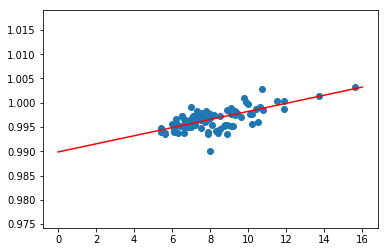

In [17]:
plt.scatter(datax,datay)
x = np.linspace(0,16,100)
y = p[0] + p[1]*x
plt.plot(x, y, '-r')

In [ ]:
p